In [ ]:
import pandas as pd

# Load datasets
# Updated path to a valid location (replace with your actual file path)
cbfr_df = pd.read_csv("/content/drive/MyDrive/CBFR_Output.csv")
weather_df = pd.read_csv("/content/drive/MyDrive/weather_pivoted.csv")

# Rename columns for consistency
weather_df.rename(columns={"Date_": "Date", "Region_": "Region"}, inplace=True)

# Convert Date column to a consistent format
cbfr_df["Date"] = pd.to_datetime(cbfr_df["Date"])
weather_df["Date"] = pd.to_datetime(weather_df["Date"], format="%d/%m/%Y")

# Check for common values before merging
common_dates = set(cbfr_df["Date"]).intersection(set(weather_df["Date"]))
common_regions = set(cbfr_df["Region"]).intersection(set(weather_df["Region"]))

if common_dates and common_regions:
    # Merge on Date and Region
    merged_df = pd.merge(cbfr_df, weather_df, on=["Date", "Region"], how="inner")

    # Save the merged dataset
    # Update path to a valid save location if needed
    merged_df.to_csv("merged_dataset.csv", index=False)

    # Display first few rows
    print("Datasets merged successfully!")
else:
    print("Datasets cannot be merged due to lack of common values.")

Datasets merged successfully!


In [ ]:
merged_df

,Date,Region,CBFR_Risk_Score,Estimated_fire_area_,max()_Precipitation,max()_RelativeHumidity,max()_SoilWaterContent,max()_SolarRadiation,max()_Temperature,max()_WindSpeed,...,Temperature_MA_3,Precipitation_MA_3,Temperature_MA_7,Precipitation_MA_7,RelativeHumidity_MA_3,RelativeHumidity_MA_7,SoilWaterContent_MA_3,SoilWaterContent_MA_7,SolarRadiation_MA_3,SolarRadiation_MA_7
0,2005-01-01,NT,0.000000,4.945000,315.266815,95.683342,0.496140,31.634459,38.136787,9.704402,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2005-01-01,QL,0.267143,38.831579,74.452164,95.898270,0.472416,31.982830,37.047943,7.675632,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2005-01-01,WA,0.337781,36.382500,127.795181,90.399254,0.405102,32.819298,36.411083,10.650237,...,29.082804,4.403475,NaN,NaN,52.827298,NaN,0.143035,NaN,24.602088,NaN
3,2005-01-02,NT,0.163266,1.320000,89.898376,93.291039,0.501195,29.250782,35.945179,9.320926,...,29.087463,2.957401,28.578654,1.776764,46.577338,42.121037,0.120517,0.097832,25.899371,26.446456
4,2005-01-02,QL,0.247347,64.464286,87.775497,95.837463,0.477548,31.729107,35.675449,7.094274,...,27.950807,3.372439,28.804127,1.936392,50.470152,43.727266,0.139077,0.112914,24.923856,26.362396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53293,2020-12-31,WA,0.170430,10.800000,11.643496,86.131119,0.451534,32.935452,36.086651,9.177850,...,29.499290,2.309801,25.023207,1.274953,46.915130,47.212508,0.132151,0.141791,25.641529,27.677522
53294,2021-01-01,QL,1.000000,1.000000,169.318497,95.571617,0.504384,30.593243,34.735016,9.124945,...,26.453788,2.570594,26.760915,1.490509,50.933352,46.824582,0.161547,0.140295,27.931907,27.597639
53295,2021-01-01,WA,0.208181,105.789000,5.896117,85.072189,0.419963,32.540558,36.846825,11.479685,...,30.253117,2.625292,26.377371,1.376472,46.789973,46.633090,0.126942,0.137592,26.008727,27.698257
53296,2021-01-02,QL,0.356931,7.637500,82.720490,95.573151,0.509058,30.354275,34.744389,10.622037,...,26.390481,2.293789,27.402034,1.226984,53.535405,46.818020,0.161305,0.137252,27.821898,28.250636


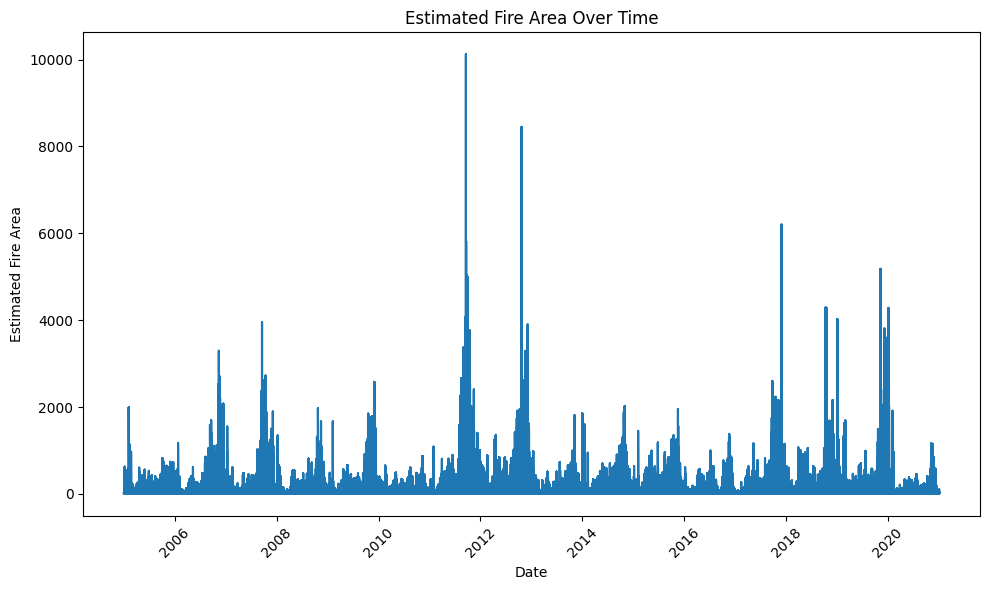

In [ ]:

import matplotlib.pyplot as plt

# Assuming 'merged_df' is available from the previous code

# Check if 'merged_df' exists and has the required column
if 'merged_df' in locals() and 'Estimated_fire_area_' in merged_df.columns:
    plt.figure(figsize=(10, 6))
    plt.plot(merged_df['Date'], merged_df['Estimated_fire_area_'])
    plt.xlabel('Date')
    plt.ylabel('Estimated Fire Area')
    plt.title('Estimated Fire Area Over Time')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("'merged_df' not found or does not contain 'Estimated_fire_area_' column.")


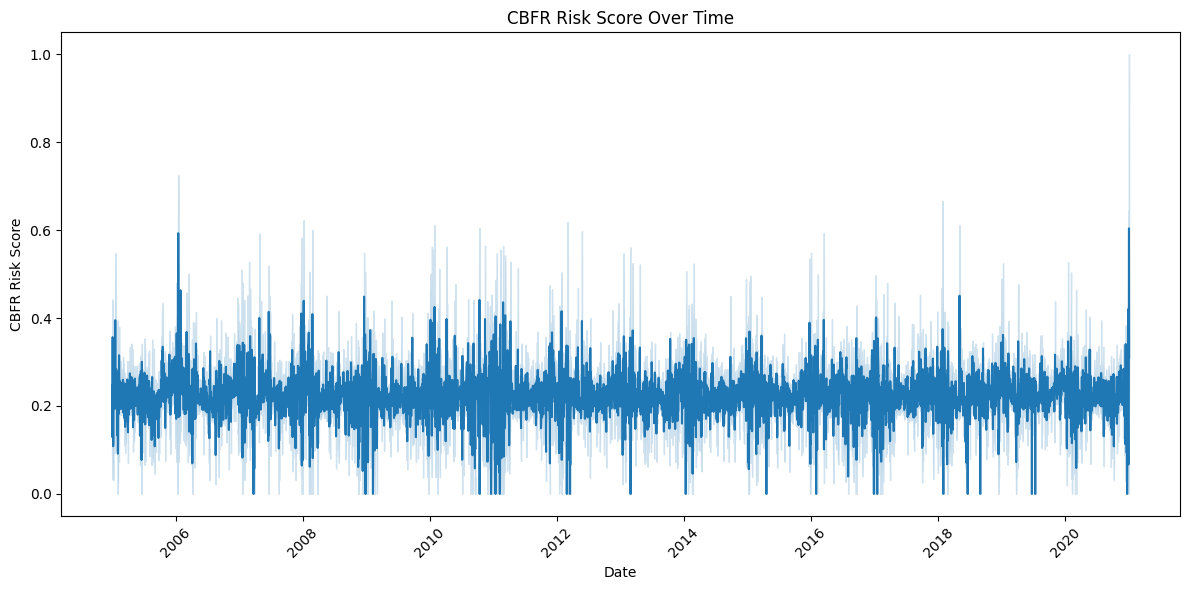

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plot_data = merged_df[["Date", "CBFR_Risk_Score"]]
plt.figure(figsize=(12, 6))
sns.lineplot(x="Date", y="CBFR_Risk_Score", data=plot_data)
plt.xlabel("Date")
plt.ylabel("CBFR Risk Score")
plt.title("CBFR Risk Score Over Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import adfuller

# Load dataset
df = pd.read_csv("merged_dataset.csv")

# Convert date column to datetime format
if "Date_" in df.columns:
    df["Date_"] = pd.to_datetime(df["Date_"])
    df.sort_values(by=["Date_"], inplace=True)

# Step 1: Handle missing values (only for numeric columns)
numeric_cols = df.select_dtypes(include=["number"]).columns.tolist()
df[numeric_cols] = df[numeric_cols].apply(lambda x: x.fillna(x.median()))

# Step 2: Ensure stationarity
TARGET_COL = "Estimated_fire_area_"  # Update based on dataset
if TARGET_COL in df.columns:
    adf_result = adfuller(df[TARGET_COL].dropna())
    if adf_result[1] > 0.05:  # If p-value > 0.05, data is non-stationary
        df[TARGET_COL] = df[TARGET_COL].diff().fillna(df[TARGET_COL].median())  # Avoid filling with 0

# Step 3: Normalize numerical features
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Step 4: Remove low-covariance features
cov_threshold = 0.01
cov_matrix = df[numeric_cols].cov()
important_features = cov_matrix[TARGET_COL][abs(cov_matrix[TARGET_COL]) > cov_threshold].index.tolist()

# Ensure at least some features are kept
if len(important_features) == 0:
    important_features = numeric_cols  # Keep all numeric columns if filtering removes everything

# Check if 'Date_' exists before using it
if "Date_" in df.columns:
    df_optimized = df[important_features + ["Date_"]]
else:
    df_optimized = df[important_features]
    print("Warning: 'Date_' column not found. Available columns:", df.columns.tolist())

# Save preprocessed dataset
df_optimized.to_csv("merged_dataset_optimized.csv", index=False)

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load preprocessed dataset
df = pd.read_csv("merged_dataset_optimized.csv")

# Ensure date is in datetime format (if available)
if "Date_" in df.columns:
    df["Date_"] = pd.to_datetime(df["Date_"])
    df = df.sort_values(by=["Date_"])
    df = df.drop(columns=["Date_"])

# Define target variable
TARGET_COL = "Estimated_fire_area_"  # Adjust based on dataset
y = df[TARGET_COL].values
X = df.drop(columns=[TARGET_COL]).values

# Scale features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Reshape for LSTM (samples, time steps, features)
time_steps = 10  # Use last 10 timesteps for prediction
X_lstm, y_lstm = [], []
for i in range(len(X) - time_steps):
    X_lstm.append(X[i:i+time_steps])
    y_lstm.append(y[i+time_steps])
X_lstm, y_lstm = np.array(X_lstm), np.array(y_lstm)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_lstm, y_lstm, test_size=0.2, random_state=42, shuffle=False)

# Build LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_steps, X_train.shape[2])),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

# Compile model
model.compile(optimizer='adam', loss='mse')

# Train model
epochs = 10
batch_size = 16
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))

# Predictions
y_pred = model.predict(X_test)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
2665/2665 ━━━━━━━━━━━━━━━━━━━━ 46s 16ms/step - loss: 0.0014 - val_loss: 7.0236e-04
Epoch 2/10
2665/2665 ━━━━━━━━━━━━━━━━━━━━ 72s 12ms/step - loss: 9.1213e-04 - val_loss: 6.9009e-04
Epoch 3/10
2665/2665 ━━━━━━━━━━━━━━━━━━━━ 35s 13ms/step - loss: 8.4908e-04 - val_loss: 6.6565e-04
Epoch 4/10
2665/2665 ━━━━━━━━━━━━━━━━━━━━ 32s 12ms/step - loss: 8.4713e-04 - val_loss: 6.7105e-04
Epoch 5/10
2665/2665 ━━━━━━━━━━━━━━━━━━━━ 57s 18ms/step - loss: 8.1180e-04 - val_loss: 6.4594e-04
Epoch 6/10
2665/2665 ━━━━━━━━━━━━━━━━━━━━ 65s 12ms/step - loss: 8.2573e-04 - val_loss: 6.3479e-04
Epoch 7/10
2665/2665 ━━━━━━━━━━━━━━━━━━━━ 42s 12ms/step - loss: 7.7422e-04 - val_loss: 6.5994e-04
Epoch 8/10
2665/2665 ━━━━━━━━━━━━━━━━━━━━ 33s 12ms/step - loss: 8.0766e-04 - val_loss: 6.9500e-04
Epoch 9/10
2665/2665 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - loss: 7.2692e-04 - val_loss: 6.3187e-04
Epoch 10/10
2665/2665 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - loss: 7.3335e-04 - val_loss: 6.2909e-04
334/334 ━━━━━━━━━━━━━━━

In [ ]:
from sklearn.metrics import mean_absolute_error
import math

mae = mean_absolute_error(y_test, y_pred)
rmse = math.sqrt(mse)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")


MAE: 0.01242443604334476
MSE: 0.0006593564152833993
RMSE: 0.025677936351728096
R2 Score: 0.614592142296946
